<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import matplotlib.pyplot as plt
import plotly.express as px

import os

In [9]:
cities=[]
total_users=[]
sig_users=[]
res_users=[]
radius=[]

for i in os.listdir("/content/drive/MyDrive/Networks in cities/Dados"):
  if(i=="Fortaleza" or i==".ipynb_checkpoints"):
    continue

  cities.append(i)

  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo.txt",'r+')
  total_users.append(int(file.readline().split()[1])/1000)
  sig_users.append(int(file.readline().split()[2])/1000)
  file=open("/content/drive/MyDrive/Networks in cities/Dados/"+i+"/demo2.txt",'r+')
  res_users.append(int(file.readline().split()[3])/1000)

  df=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/results.txt")
  radius.append(float(df._get_value(len(df)-1,' total_distance')))

  df2=pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/" +i+ "/antennas_"+i+".txt")
  print(i+": "+str(len(df2))+" antenas")

Caucaia: 116 antenas
Franca: 75 antenas
Jundiaí: 153 antenas
Piracicaba: 152 antenas
Suzano: 63 antenas
Taubaté: 128 antenas
Mogi das Cruzes: 98 antenas
Montes Claros: 85 antenas
Ponta Grossa: 90 antenas
Rio Branco: 123 antenas


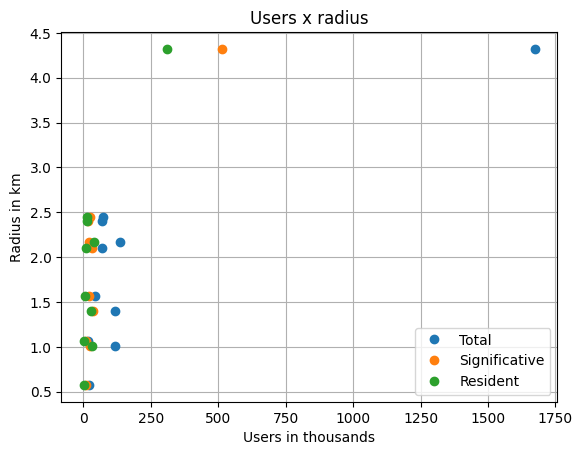

In [10]:
# Plot
plt.plot(total_users, radius, 'o', label='Total')
plt.plot(sig_users, radius, 'o', label='Significative')
plt.plot(res_users, radius, 'o', label='Resident')

#labels for points
#for i in range(len(radius)):
#    plt.text(total_users[i], radius[i], cities[i], ha='right')
#    plt.text(sig_users[i], radius[i], cities[i], ha='right')
#    plt.text(res_users[i], radius[i], cities[i], ha='right')

# Customize plot
plt.xlabel('Users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

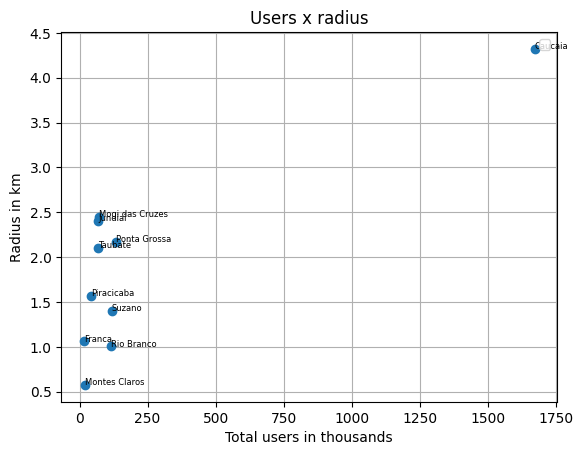

In [11]:
# Plot
plt.plot(total_users, radius, 'o')

#labels for points
for i in range(len(radius)):
    plt.text(total_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Total users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

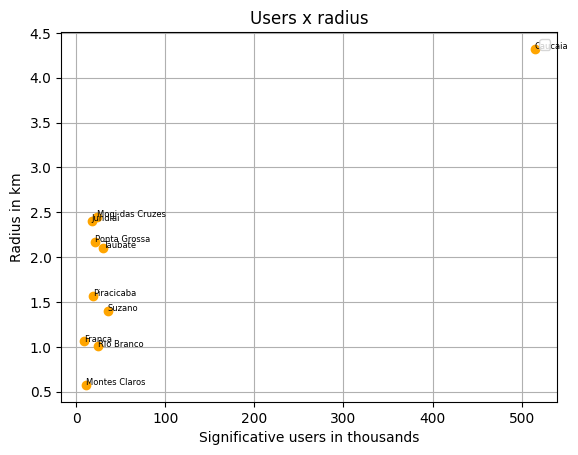

In [12]:
# Plot
plt.plot(sig_users, radius, 'o',color="orange")

#labels for points
for i in range(len(radius)):
    plt.text(sig_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Significative users in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

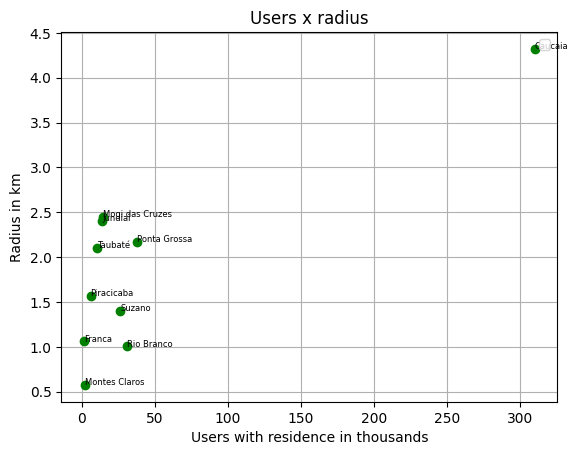

In [13]:
# Plot
plt.plot(res_users, radius, 'o', color="green")

#labels for points
for i in range(len(radius)):
    plt.text(res_users[i], radius[i], cities[i], ha='left',fontsize=6)

# Customize plot
plt.xlabel('Users with residence in thousands')
plt.ylabel('Radius in km')
plt.title('Users x radius')
plt.legend()

# Show plot
plt.grid(True)
plt.show()